In [1]:
from math import *
import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from itertools import combinations

Constants

In [7]:
count_points = 20
alpha = 0.5
G0 = 0

Function and points and space

In [89]:
y = lambda x: 2 * pow((x-2),2)+1
data = data = np.array([(i,y(i)) for i in np.linspace(1.,3.,count_points)])
data_colocation = np.array([(data[i]+data[i+1])/2 for i in range(len(data)-1)])
R = np.array([sqrt(pow(data[i+1,0]-data[i,0],2)+pow(data[i+1,1]-data[i,1],2)) for i in range(len(data)-1)])
v_inf = np.array((sin(alpha),cos(alpha)))

area = np.zeros((40,40))
mesh = []
for i in np.linspace(0.,4.,40):
    for j in np.linspace(0.,4.,40):
        mesh.append([i,j])
mesh = np.array(mesh)

Plot point and colocation

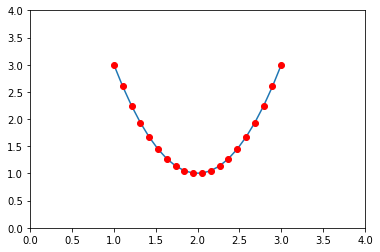

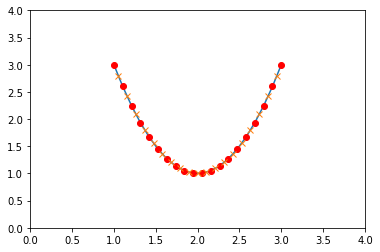

In [4]:
plt.ylim(0,4)
plt.xlim(0, 4)
plt.plot(data[:,0],data[:,1])
plt.plot(data[:,0],data[:,1],'ro')
plt.show()

plt.ylim(0,4)
plt.xlim(0,4)
plt.plot(data[:,0],data[:,1])
plt.plot(data[:,0],data[:,1],'ro')
plt.plot(data_colocation[:,0],data_colocation[:,1],'x')
plt.show()

In [6]:
data_colocation

array([[1.05263158, 2.80055402],
       [1.15789474, 2.42382271],
       [1.26315789, 2.09141274],
       [1.36842105, 1.8033241 ],
       [1.47368421, 1.55955679],
       [1.57894737, 1.3601108 ],
       [1.68421053, 1.20498615],
       [1.78947368, 1.09418283],
       [1.89473684, 1.02770083],
       [2.        , 1.00554017],
       [2.10526316, 1.02770083],
       [2.21052632, 1.09418283],
       [2.31578947, 1.20498615],
       [2.42105263, 1.3601108 ],
       [2.52631579, 1.55955679],
       [2.63157895, 1.8033241 ],
       [2.73684211, 2.09141274],
       [2.84210526, 2.42382271],
       [2.94736842, 2.80055402]])

In [58]:
def normal2point(x0,y0,x1,y1):
    x = (x1-x0)/sqrt(pow(x1-x0,2)+pow(y1-y0,2))
    y = (y1-y0)/sqrt(pow(x1-x0,2)+pow(y1-y0,2))
    return (-y,x)

def Rj(x0,y0,x,y):
    return np.max(np.array([0.5*np.min(R),sqrt(pow(x-x0,2)+pow(y-y0,2))]))

def vj(x,y,x0,y0):
    res_x = (x-x0)/(2*pi*pow(Rj(x0,y0,x,y),2)) 
    res_y = (y-y0)/(2*pi*pow(Rj(x0,y0,x,y),2))
    return [res_x,res_y]

def createMatrix(collocation, points, v_inf, G0):
    norm = [np.array(normal2point(points[i,0],points[i,1],points[i+1,0],points[i+1,1])).reshape(2,1) for i in range(len(points)-1) ] 
    b = [np.dot(-1*v_inf,i) for i in norm]
    b.append(G0)
    b = np.array(b, dtype='float') 
    A = []
    for i in range(len(collocation)):
        A.append([np.dot(vj(collocation[i,0],collocation[i,1],p[0],p[1]),norm[i])[0] for p in points])
    A.append(np.ones(len(points)))
    A = np.array(A, dtype='float') 
    return np.linalg.solve(A,b)
    

In [60]:
Gamma = createMatrix(data_colocation, data, v_inf, G0)

In [103]:
def phi(x, y, t, points, G):
    return x*sin(alpha) + y*cos(alpha) + np.sum([G[j]/(2*pi)*atan((y-points[j,1])/(x-points[j,0])) for j in range(len(points))])

In [104]:
for i in range(area.shape[0]):
    for j in range(area.shape[1]):
        area[i,j] = phi(mesh[i,j][0], mesh[i,j][1], 1, data, Gamma)

In [105]:
mesh = mesh.reshape(40,40,2)

In [106]:
area

array([[ 2.37376994e+13,  2.42017958e+13,  2.46955826e+13, ...,
        -1.56727400e+12, -8.58797060e+12, -1.46187815e+13],
       [ 2.37930804e+13,  2.42472190e+13,  2.47290311e+13, ...,
        -5.34906103e+12, -1.29242208e+13, -1.92665966e+13],
       [ 2.38242238e+13,  2.42650908e+13,  2.47308828e+13, ...,
        -1.04795777e+13, -1.84976723e+13, -2.50135793e+13],
       ...,
       [ 2.38242238e+13,  2.42650908e+13,  2.47308828e+13, ...,
        -1.04795777e+13, -1.84976723e+13, -2.50135793e+13],
       [ 2.37930804e+13,  2.42472190e+13,  2.47290311e+13, ...,
        -5.34906103e+12, -1.29242208e+13, -1.92665966e+13],
       [ 2.37376994e+13,  2.42017958e+13,  2.46955826e+13, ...,
        -1.56727400e+12, -8.58797060e+12, -1.46187815e+13]])

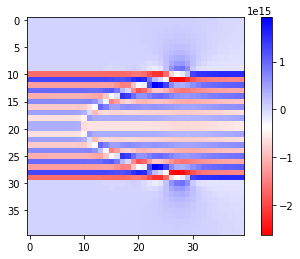

In [108]:
#### cmap = mcolors.LinearSegmentedColormap.from_list('colormap', ('red', 'white', 'blue'))
plt.imshow(area, cmap=cmap)
plt.colorbar()
#plt.imshow(test, cmap=cmap)

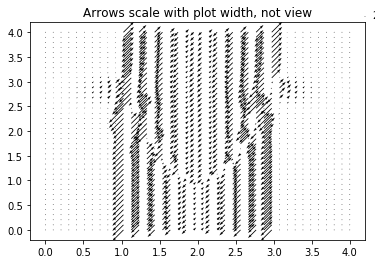

In [131]:
U = area
V = area
fig1, ax1 = plt.subplots()
ax1.set_title('Arrows scale with plot width, not view')
Q = ax1.quiver(X, Y, U, V, units='width')
qk = ax1.quiverkey(Q, 0.9, 0.9, 2,'' r'$2 \frac{m}{s}$''', labelpos='E',
                   coordinates='figure')

In [121]:
X = mesh.reshape(40*40,2)[:,0]
Y = mesh.reshape(40*40,2)[:,1]